In [59]:
%matplotlib inline
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


df = pd.read_csv('../input/Immatriculations.csv', encoding = "ISO-8859-1")
print(df.shape)
df.head(3)


(2000000, 10)


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029


In [60]:
df.dtypes

immatriculation    object
marque             object
nom                object
puissance           int64
longueur           object
nbPlaces            int64
nbPortes            int64
couleur            object
occasion             bool
prix                int64
dtype: object

In [61]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,immatriculation,marque,nom,longueur,couleur
0,3176 TS 67,Renault,Laguna 2.0T,longue,blanc
1,3721 QS 49,Volvo,S80 T6,très longue,noir
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,moyenne,gris
3,3563 LA 55,Peugeot,1007 1.4,courte,blanc
4,6963 AX 34,Audi,A2 1.4,courte,gris


In [62]:
obj_df[obj_df.isnull().any(axis=1)]

,immatriculation,marque,nom,longueur,couleur


In [63]:
dfCouleur = pd.get_dummies(df['couleur'])
df = pd.concat([df, dfCouleur], axis=1).drop(['couleur'] , axis=1)

df.head(3)

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,blanc,bleu,gris,noir,rouge
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,False,27300,1,0,0,0,0
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,False,50500,0,0,0,1,0
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,True,16029,0,0,1,0,0


In [64]:
dfCouleur = pd.get_dummies(df['occasion'])
df = pd.concat([df, dfCouleur], axis=1).drop(['occasion'] , axis=1)

In [65]:
dfCouleur = pd.get_dummies(df['longueur'])
df = pd.concat([df, dfCouleur], axis=1).drop(['longueur'] , axis=1)

In [66]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["marque_code"] = lb_make.fit_transform(df["marque"])
df[["marque", "marque_code"]].head(11)

,marque,marque_code
0,Renault,13
1,Volvo,18
2,Volkswagen,17
3,Peugeot,12
4,Audi,0
5,Skoda,16
6,Renault,13
7,Mercedes,9
8,BMW,1
9,Saab,14


In [67]:
df = df.drop(['marque'] , axis=1)
df.head(5)

,immatriculation,nom,puissance,nbPlaces,nbPortes,prix,blanc,bleu,gris,noir,rouge,False,True,courte,longue,moyenne,très longue,marque_code
0,3176 TS 67,Laguna 2.0T,170,5,5,27300,1,0,0,0,0,1,0,0,1,0,0,13
1,3721 QS 49,S80 T6,272,5,5,50500,0,0,0,1,0,1,0,0,0,0,1,18
2,9099 UV 26,Golf 2.0 FSI,150,5,5,16029,0,0,1,0,0,0,1,0,0,1,0,17
3,3563 LA 55,1007 1.4,75,5,5,9625,1,0,0,0,0,0,1,1,0,0,0,12
4,6963 AX 34,A2 1.4,75,5,5,18310,0,0,1,0,0,1,0,1,0,0,0,0


In [68]:
df['immatriculation'] = df['immatriculation'].map(lambda x: int(str(x).split(' ')[2]))
df.head(2)

,immatriculation,nom,puissance,nbPlaces,nbPortes,prix,blanc,bleu,gris,noir,rouge,False,True,courte,longue,moyenne,très longue,marque_code
0,67,Laguna 2.0T,170,5,5,27300,1,0,0,0,0,1,0,0,1,0,0,13
1,49,S80 T6,272,5,5,50500,0,0,0,1,0,1,0,0,0,0,1,18


In [69]:
lbl = LabelEncoder()

for i in range(df['nom'].map(lambda x: len(str(x).split(' '))).max()):
    df['nom'+str(i)] = lbl.fit_transform(df['nom'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else ''))
df['nom'] = lbl.fit_transform(df['nom'])

In [70]:
df.head(5)

,immatriculation,nom,puissance,nbPlaces,nbPortes,prix,blanc,bleu,gris,noir,...,True,courte,longue,moyenne,très longue,marque_code,nom0,nom1,nom2,nom3
0,67,11,170,5,5,27300,1,0,0,0,...,0,0,1,0,0,13,11,9,0,0
1,49,22,272,5,5,50500,0,0,0,1,...,0,0,0,0,1,18,22,16,0,0
2,26,10,150,5,5,16029,0,0,1,0,...,1,0,0,1,0,17,10,8,5,0
3,55,0,75,5,5,9625,1,0,0,0,...,1,1,0,0,0,12,0,4,0,0
4,34,3,75,5,5,18310,0,0,1,0,...,0,1,0,0,0,0,3,4,0,0


In [71]:
df.describe()

,immatriculation,nom,puissance,nbPlaces,nbPortes,prix,blanc,bleu,gris,noir,...,True,courte,longue,moyenne,très longue,marque_code,nom0,nom1,nom2,nom3
count,2.000000e+06,2.000000e+06,2.000000e+06,2000000.0,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,...,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,5.397633e+01,1.345897e+01,1.990422e+02,5.0,4.868432e+00,3.578257e+04,1.995070e-01,2.003895e-01,2.004100e-01,1.999825e-01,...,3.127450e-01,2.748330e-01,2.725895e-01,1.156390e-01,3.369385e-01,8.036182e+00,1.345897e+01,6.304995e+00,1.548962e+00,6.159900e-02
std,2.569872e+01,8.641620e+00,1.371486e+02,0.0,4.958084e-01,2.577564e+04,3.996299e-01,4.002919e-01,4.003073e-01,3.999870e-01,...,4.636116e-01,4.464302e-01,4.452915e-01,3.197916e-01,4.726638e-01,6.194648e+00,8.641620e+00,5.101732e+00,2.521172e+00,2.404259e-01
min,1.000000e+01,0.000000e+00,5.500000e+01,5.0,3.000000e+00,7.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.200000e+01,3.000000e+00,7.500000e+01,5.0,5.000000e+00,1.831000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
50%,5.400000e+01,1.300000e+01,1.500000e+02,5.0,5.000000e+00,2.597000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.300000e+01,5.000000e+00,0.000000e+00,0.000000e+00
75%,7.600000e+01,2.200000e+01,2.450000e+02,5.0,5.000000e+00,4.920000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,2.200000e+01,1.100000e+01,3.000000e+00,0.000000e+00
max,9.800000e+01,2.700000e+01,5.070000e+02,5.0,5.000000e+00,1.013000e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,2.700000e+01,1.600000e+01,7.000000e+00,1.000000e+00


In [72]:
# from the describe we can see nbPlaces is always the same, so it has no concrete value
df= df.drop(['nbPlaces'] , axis=1)

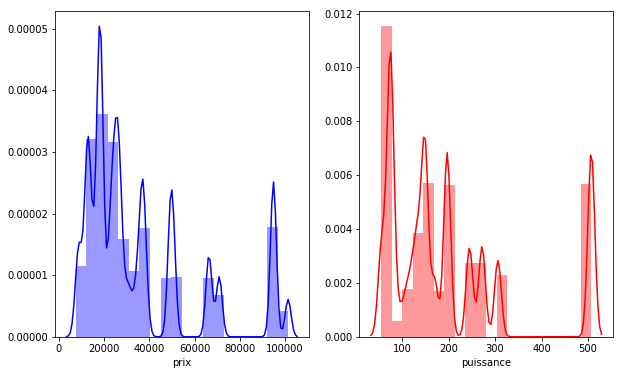

Mean of distribution 35782.5696715 and standard deviation of distribution 25775.63416416892.
Mean of distribution 199.0421865 and standard deviation of distribution 137.14853209130322.


In [73]:
mu = np.mean(df['prix'].values)  # mean of distribution
sigma =np.std(df['prix'].values) # standard deviation of distribution

mu2 = np.mean(df['puissance'].values)  # mean of distribution
sigma2 =np.std(df['puissance'].values) # standard deviation of distribution


fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()
sns.distplot(df['prix'],bins=20,ax=ax1,color='b')
sns.distplot(df['puissance'],bins=20,ax=ax2,color='r')
plt.show()



print('Mean of distribution {} and standard deviation of distribution {}.'.format(mu,sigma))
print('Mean of distribution {} and standard deviation of distribution {}.'.format(mu2,sigma2))

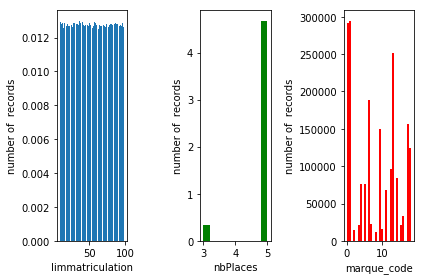

In [74]:
num_bins = 100

fig, ax = plt.subplots(ncols=3, sharey=False)

# the histogram of the data
n, bins, patches = ax[0].hist(df['immatriculation'].values, num_bins, normed=1)
n2, bins2, patches = ax[1].hist(df['nbPortes'].values, bins=10, normed=1,color='g')

# add a 'best fit' line

ax[0].set_xlabel('limmatriculation')
ax[0].set_ylabel('number of  records')

# add a 'best fit' line

ax[1].set_xlabel('nbPlaces')
ax[1].set_ylabel('number of  records')

ax[2].hist(df['marque_code'].values,bins=30,color='r' )
ax[2].set_xlabel('marque_code')
ax[2].set_ylabel('number of  records')



# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler
mat = df.as_matrix()
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(mat)
data = scaler.transform(mat)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


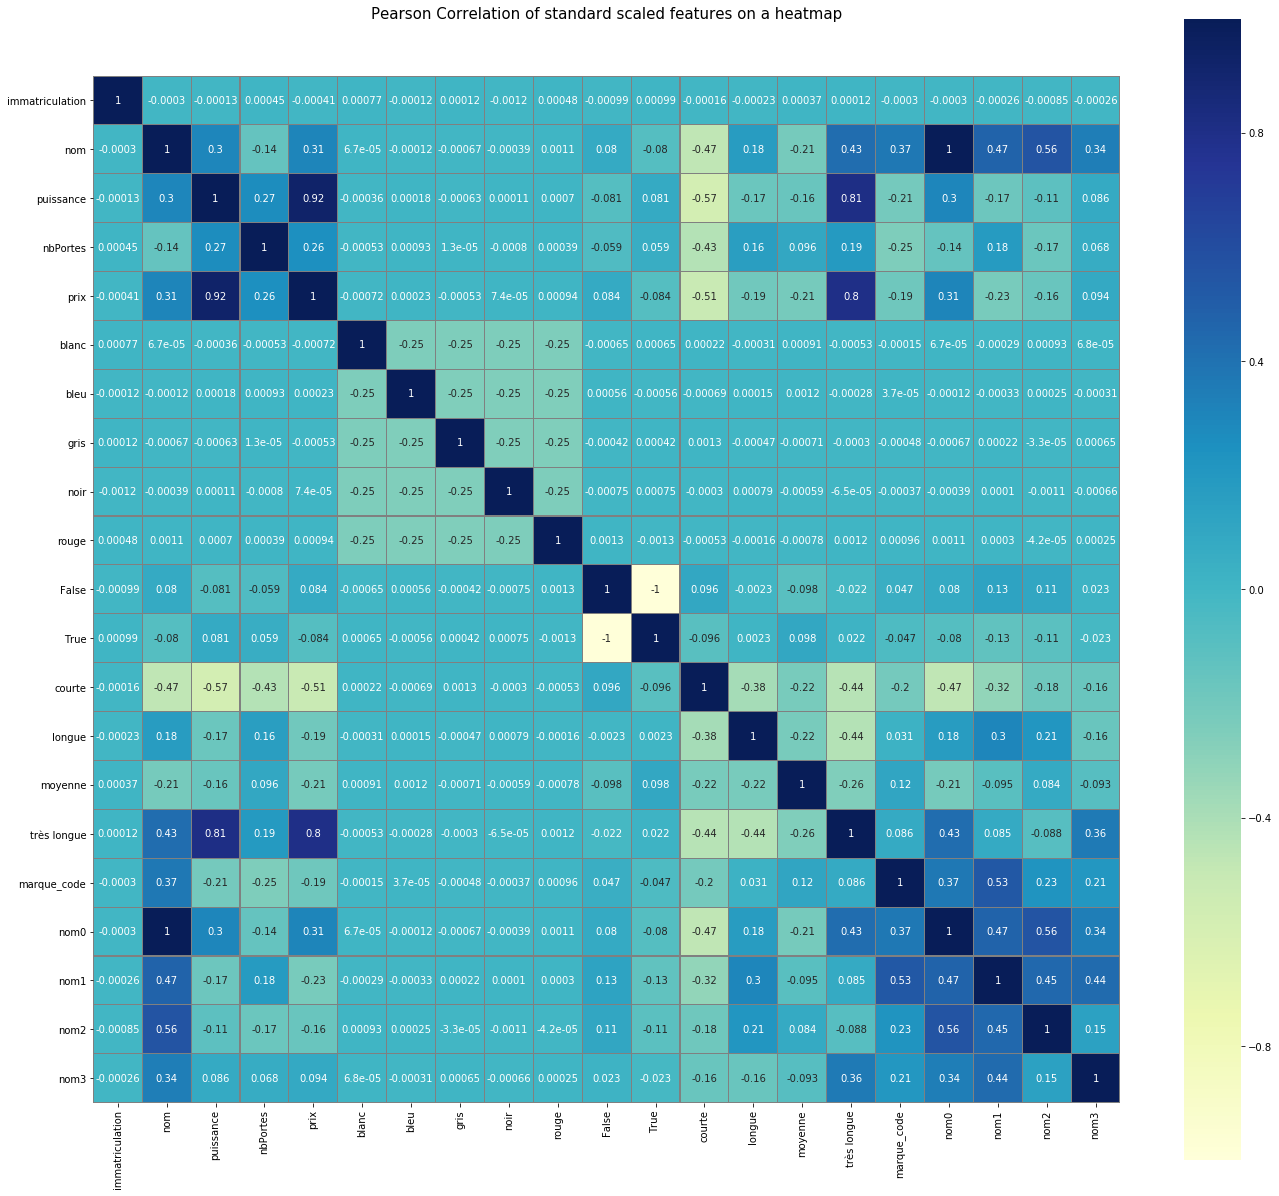

In [76]:
# Heatmap to see differents correlations between data
plt.figure(figsize=(23,21))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='grey', annot=True, cmap="YlGnBu")

In [78]:
DF_test = pd.Dataframe(data)

# Heatmap to see differents correlations between data
plt.figure(figsize=(23,21))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(DF_test.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='grey', annot=True, cmap="YlGnBu")

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
dataPca = pca.fit_transform(data)

In [ ]:
plt.scatter(dataPca[:, 0], dataPca[:, 1])
plt.show()
df_postPCA = pd.DataFrame(dataPca)
df_postPCA.head(5)

In [ ]:
from sklearn.cluster import KMeans

# Using sklearn
km = KMeans(init='k-means++', n_clusters=5, n_init=10)
km.fit(dataPca)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
#results = pd.DataFrame([df.index,labels])
#print(results.head(5))

In [ ]:
df_postPCA['cluster_predicted'] = pd.Series(labels)
df_postPCA.head(10)

In [ ]:
df_cluster_zero   = df_postPCA.loc[df_postPCA['cluster_predicted'] == 0]
df_cluster_un     = df_postPCA.loc[df_postPCA['cluster_predicted'] == 1]
df_cluster_deux   = df_postPCA.loc[df_postPCA['cluster_predicted'] == 2]
df_cluster_trois  = df_postPCA.loc[df_postPCA['cluster_predicted'] == 3]
df_cluster_quatre = df_postPCA.loc[df_postPCA['cluster_predicted'] == 4]

plt.scatter(df_cluster_zero[0],   df_cluster_zero[1],   color="red",    label=0)
plt.scatter(df_cluster_un[0],     df_cluster_un[1],     color="blue",   label=1)
plt.scatter(df_cluster_deux[0],   df_cluster_deux[1],   color="green",  label=2)
plt.scatter(df_cluster_trois[0],  df_cluster_trois[1],  color="yellow", label=3)
plt.scatter(df_cluster_quatre[0], df_cluster_quatre[1], color="grey",   label=4)
plt.legend(fontsize='small')
plt.title("Cluster des voitures en catégorie :")
plt.show()